In [1]:
%pip install holidays
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import holidays
import math
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


# Import, Assess, Clean, Preprocess
Load the dataset and get a sense of the structure, correct data types and check for NANs and Duplicate data.

In [2]:
path = '/Users/caseyfranco/Desktop/Data Science Resources/Google Data Analytics Capstone/Air Traffic 2003-2023/Data/air traffic.csv'
df = pd.read_csv(path)
df.head()

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
0,2003,1,"43,032,450","4,905,830","47,938,280","785,160","57,667","842,827","36,211,422","12,885,980","49,097,402","56,191,300","17,968,572","74,159,872",64.44,71.71,66.20
1,2003,2,"41,166,780","4,245,366","45,412,146","690,351","51,259","741,610","34,148,439","10,715,468","44,863,907","50,088,434","15,587,880","65,676,314",68.18,68.74,68.31
2,2003,3,"49,992,700","5,008,613","55,001,313","797,194","58,926","856,120","41,774,564","12,567,068","54,341,633","57,592,901","17,753,174","75,346,075",72.53,70.79,72.12
3,2003,4,"47,033,260","4,345,444","51,378,704","766,260","55,005","821,265","39,465,980","10,370,592","49,836,572","54,639,679","15,528,761","70,168,440",72.23,66.78,71.02
4,2003,5,"49,152,352","4,610,834","53,763,186","789,397","55,265","844,662","41,001,934","11,575,026","52,576,960","55,349,897","15,629,821","70,979,718",74.08,74.06,74.07


In [3]:
# From the looks of it, many numeric columns are not being interpreted as numeric.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     249 non-null    int64  
 1   Month    249 non-null    int64  
 2   Dom_Pax  249 non-null    object 
 3   Int_Pax  249 non-null    object 
 4   Pax      249 non-null    object 
 5   Dom_Flt  249 non-null    object 
 6   Int_Flt  249 non-null    object 
 7   Flt      249 non-null    object 
 8   Dom_RPM  249 non-null    object 
 9   Int_RPM  249 non-null    object 
 10  RPM      249 non-null    object 
 11  Dom_ASM  249 non-null    object 
 12  Int_ASM  249 non-null    object 
 13  ASM      249 non-null    object 
 14  Dom_LF   249 non-null    float64
 15  Int_LF   249 non-null    float64
 16  LF       249 non-null    float64
dtypes: float64(3), int64(2), object(12)
memory usage: 33.2+ KB


In [4]:
# Converting all 'object' columns into int64.
columns_to_convert = df.columns[2:14]

for col in columns_to_convert:
    df[col] = df[col].str.replace(',', '')
    df[col] = df[col].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     249 non-null    int64  
 1   Month    249 non-null    int64  
 2   Dom_Pax  249 non-null    int64  
 3   Int_Pax  249 non-null    int64  
 4   Pax      249 non-null    int64  
 5   Dom_Flt  249 non-null    int64  
 6   Int_Flt  249 non-null    int64  
 7   Flt      249 non-null    int64  
 8   Dom_RPM  249 non-null    int64  
 9   Int_RPM  249 non-null    int64  
 10  RPM      249 non-null    int64  
 11  Dom_ASM  249 non-null    int64  
 12  Int_ASM  249 non-null    int64  
 13  ASM      249 non-null    int64  
 14  Dom_LF   249 non-null    float64
 15  Int_LF   249 non-null    float64
 16  LF       249 non-null    float64
dtypes: float64(3), int64(14)
memory usage: 33.2 KB


In [5]:
# Check for NAN values
df.isna().sum()

Year       0
Month      0
Dom_Pax    0
Int_Pax    0
Pax        0
Dom_Flt    0
Int_Flt    0
Flt        0
Dom_RPM    0
Int_RPM    0
RPM        0
Dom_ASM    0
Int_ASM    0
ASM        0
Dom_LF     0
Int_LF     0
LF         0
dtype: int64

In [6]:
# Check for duplicates
df.duplicated().sum()

0

In [7]:
# Need to combine the 'Year' and 'Month' columns into a DateTime series for visualizations.
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2))

# EDA + Visualizations
Gathering summary statistics and doing hist and whisker visualizations to check for outliers

In [8]:
df.head()

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF,Date
0,2003,1,43032450,4905830,47938280,785160,57667,842827,36211422,12885980,49097402,56191300,17968572,74159872,64.44,71.71,66.20,2003-01-01
1,2003,2,41166780,4245366,45412146,690351,51259,741610,34148439,10715468,44863907,50088434,15587880,65676314,68.18,68.74,68.31,2003-02-01
2,2003,3,49992700,5008613,55001313,797194,58926,856120,41774564,12567068,54341633,57592901,17753174,75346075,72.53,70.79,72.12,2003-03-01
3,2003,4,47033260,4345444,51378704,766260,55005,821265,39465980,10370592,49836572,54639679,15528761,70168440,72.23,66.78,71.02,2003-04-01
4,2003,5,49152352,4610834,53763186,789397,55265,844662,41001934,11575026,52576960,55349897,15629821,70979718,74.08,74.06,74.07,2003-05-01


In [9]:
# describe() is too cluttered. Writing code to calculate the mean, median, std, etc. for all columns
# then save it as a seperate df.
df_drop_dates = ['Year', 'Month', 'Date']
df_numeric = df.drop(df_drop_dates, axis=1)

means = round(df_numeric.mean(), 2)
medians = df_numeric.median()
std_devs = round(df_numeric.std(), 2)
variations = round(df_numeric.var(), 2)
skew = df_numeric.skew()
co_of_v = (df_numeric.std() / df_numeric.mean()) * 100
mean_med_dif = df_numeric.mean() - df_numeric.median()
kurt = df_numeric.kurtosis()

summary_df = pd.DataFrame({
    'Mean': means, # Average value of the dataset
    'Median': medians, # Middle value when data is sorted
    'Standard Deviation': std_devs, # Measures spread of data around the mean
    'Variation': variations, # Average of squared differences from the mean
    'Skewness': skew, # Indicates asymmetry of data distribution
    'Coefficient of Variation %': co_of_v, # Standard deviation relative to the mean (percentage)
    'Mean-Median Difference': mean_med_dif, # Indicates skewness direction and magnitude
    'Kurtosis': kurt # Measures tail heaviness of the distribution
})
summary_df

,Mean,Median,Standard Deviation,Variation,Skewness,Coefficient of Variation %,Mean-Median Difference,Kurtosis
Dom_Pax,55209709.91,56200104.00,10440552.12,1.090051e+14,-1.577793,18.910717,-9.903941e+05,4.947082
Int_Pax,7392209.44,7419187.00,2020273.17,4.081504e+12,-0.799335,27.329761,-2.697756e+04,1.937932
Pax,62601919.35,63899130.00,12292114.52,1.510961e+14,-1.488638,19.635364,-1.297211e+06,4.585726
Dom_Flt,706750.71,709933.00,107054.97,1.146077e+10,-1.469840,15.147487,-3.182289e+03,4.081890
Int_Flt,64736.17,66557.00,12129.62,1.471277e+08,-2.455673,18.737009,-1.820827e+03,8.323124
Flt,771486.88,779011.00,115686.73,1.338342e+10,-1.738745,14.995294,-7.524116e+03,5.128998
Dom_RPM,49578034.17,49857937.00,10355583.12,1.072381e+14,-1.001559,20.887442,-2.799028e+05,2.988005
Int_RPM,19181026.78,19689006.00,5711621.10,3.262262e+13,-0.897588,29.777452,-5.079792e+05,1.505328
RPM,68759060.96,69005186.00,15488747.28,2.399013e+14,-1.036702,22.526118,-2.461250e+05,2.869725
Dom_ASM,61318217.15,60889086.00,8996673.01,8.094013e+13,-0.909883,14.672105,4.291311e+05,3.672872


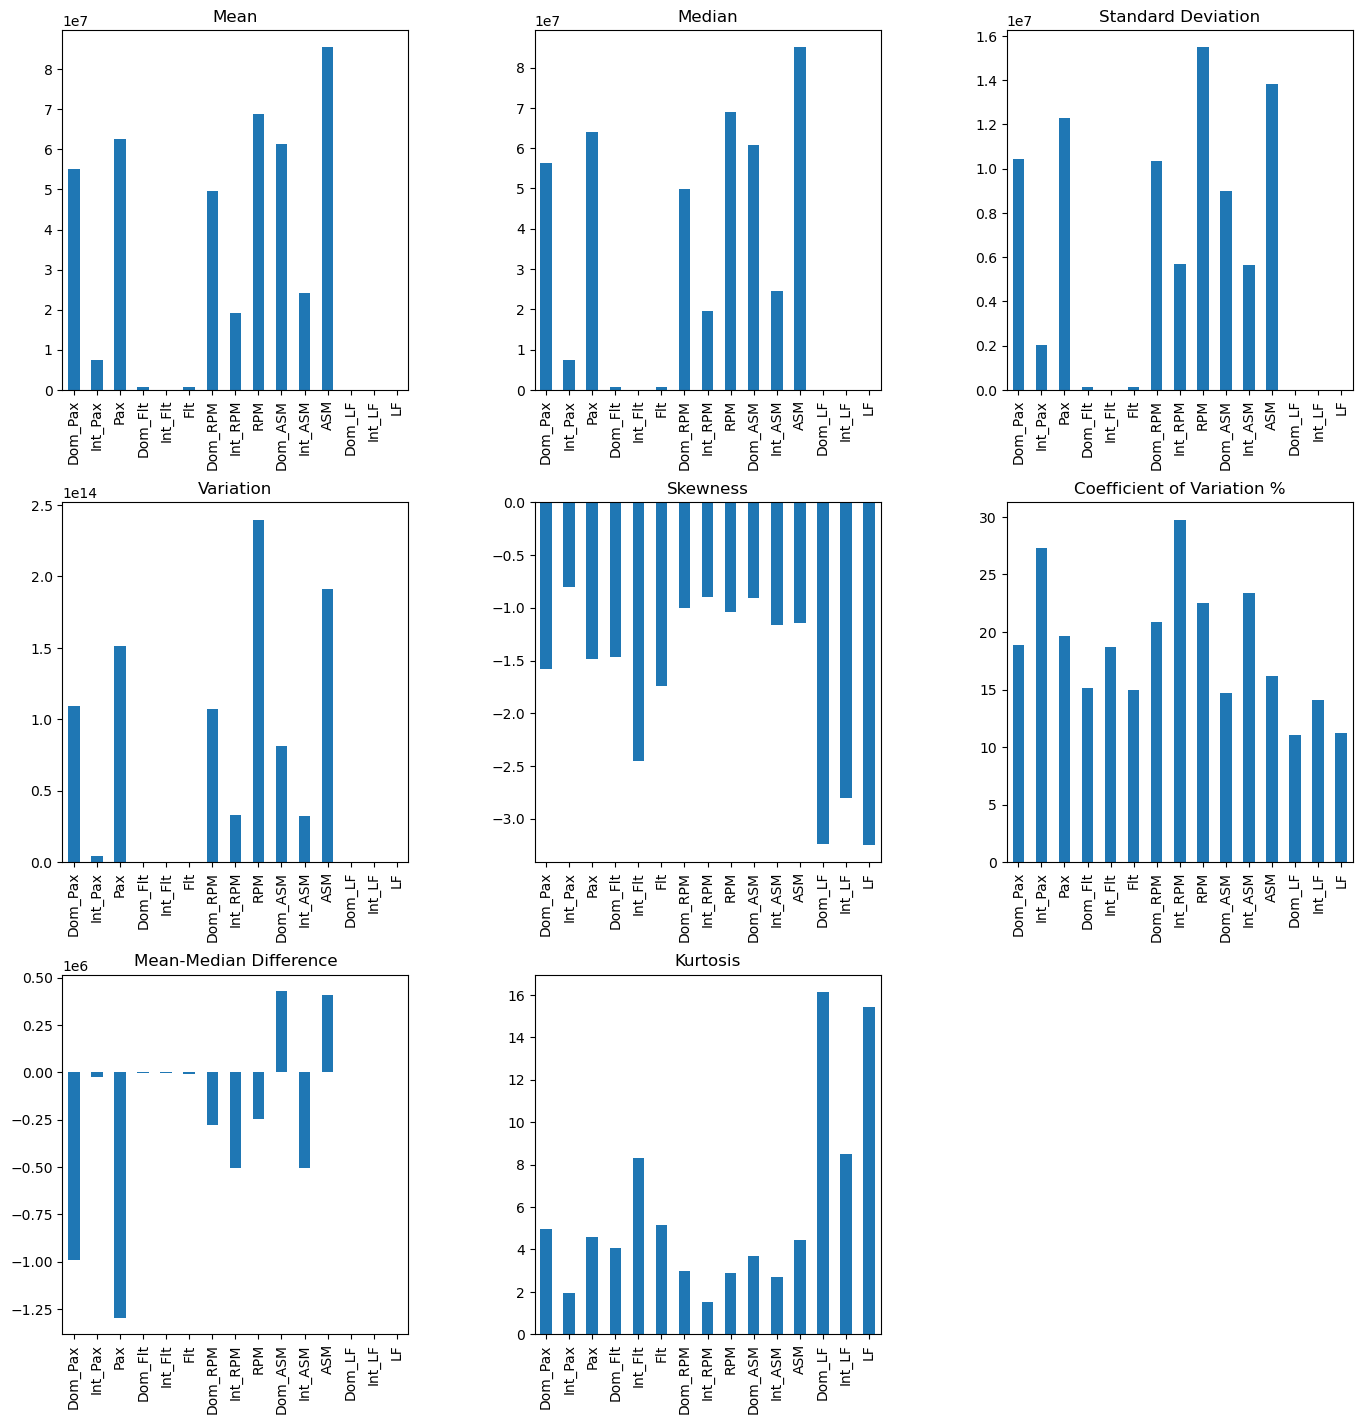

In [10]:
# Visualizing Summary Stats

num_columns = len(summary_df.columns)

rows = 3
cols = 3

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 15))
fig.tight_layout(pad=6.0)

for i, column in enumerate(summary_df.columns):
    ax = axes[i // cols, i % cols]
    summary_df[column].plot(kind='bar', ax=ax, title=column)

for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.show()

## Summary Findings:

Skewness:
Most variables show a negative skew, meaning the tail is longer on the left side of the distribution. This indicates that the mean is less than the median for these variables. **Notably, the skewness is quite pronounced in Dom_LF, Int_LF, and LF, suggesting a significant asymmetry in these distributions.**

- This could indicate that there are periods or instances of significantly lower-than-average performance or values in measures like passengers (Pax), flights (Flt), and load factor (LF). This might be important for strategic planning, as it points to variability that could impact operational decisions or financial forecasting.

Coefficient of Variation (CV) %:
Int_RPM has a notably high CV of about 29.78%, indicating a relatively high level of dispersion around the mean. This suggests that **the data points for Int_RPM are more spread out compared to other variables.**

- This could mean that international passenger travel distances vary greatly. This variability could impact decisions related to route planning, pricing strategies, or capacity management.

Mean-Median Difference:
**The differences are generally small relative to the mean and median values themselves, except for Pax, RPM, and ASM**, where the differences are relatively larger. This can be expected in distributions with some degree of skewness.

- Stakeholders should be aware that averages might not represent the most common scenario and might need to focus on median values for a more realistic picture.

Kurtosis:
**Dom_LF, Int_LF, and LF have very high kurtosis values, indicating heavy tails or outliers in the distribution.** This could imply that there are extreme values in these variables that do not conform to a normal distribution.

- This could indicate unpredictability in load factor, which can affect revenue management and capacity planning.

**Standard Deviation and Variation:
These values are quite high for Pax, Dom_Flt, Flt, Dom_RPM, RPM, and ASM.** High standard deviation and variation indicate a wide spread of the data points around the mean.

- This variability should be a point of consideration for stakeholders in strategic planning, resource allocation, and risk management.

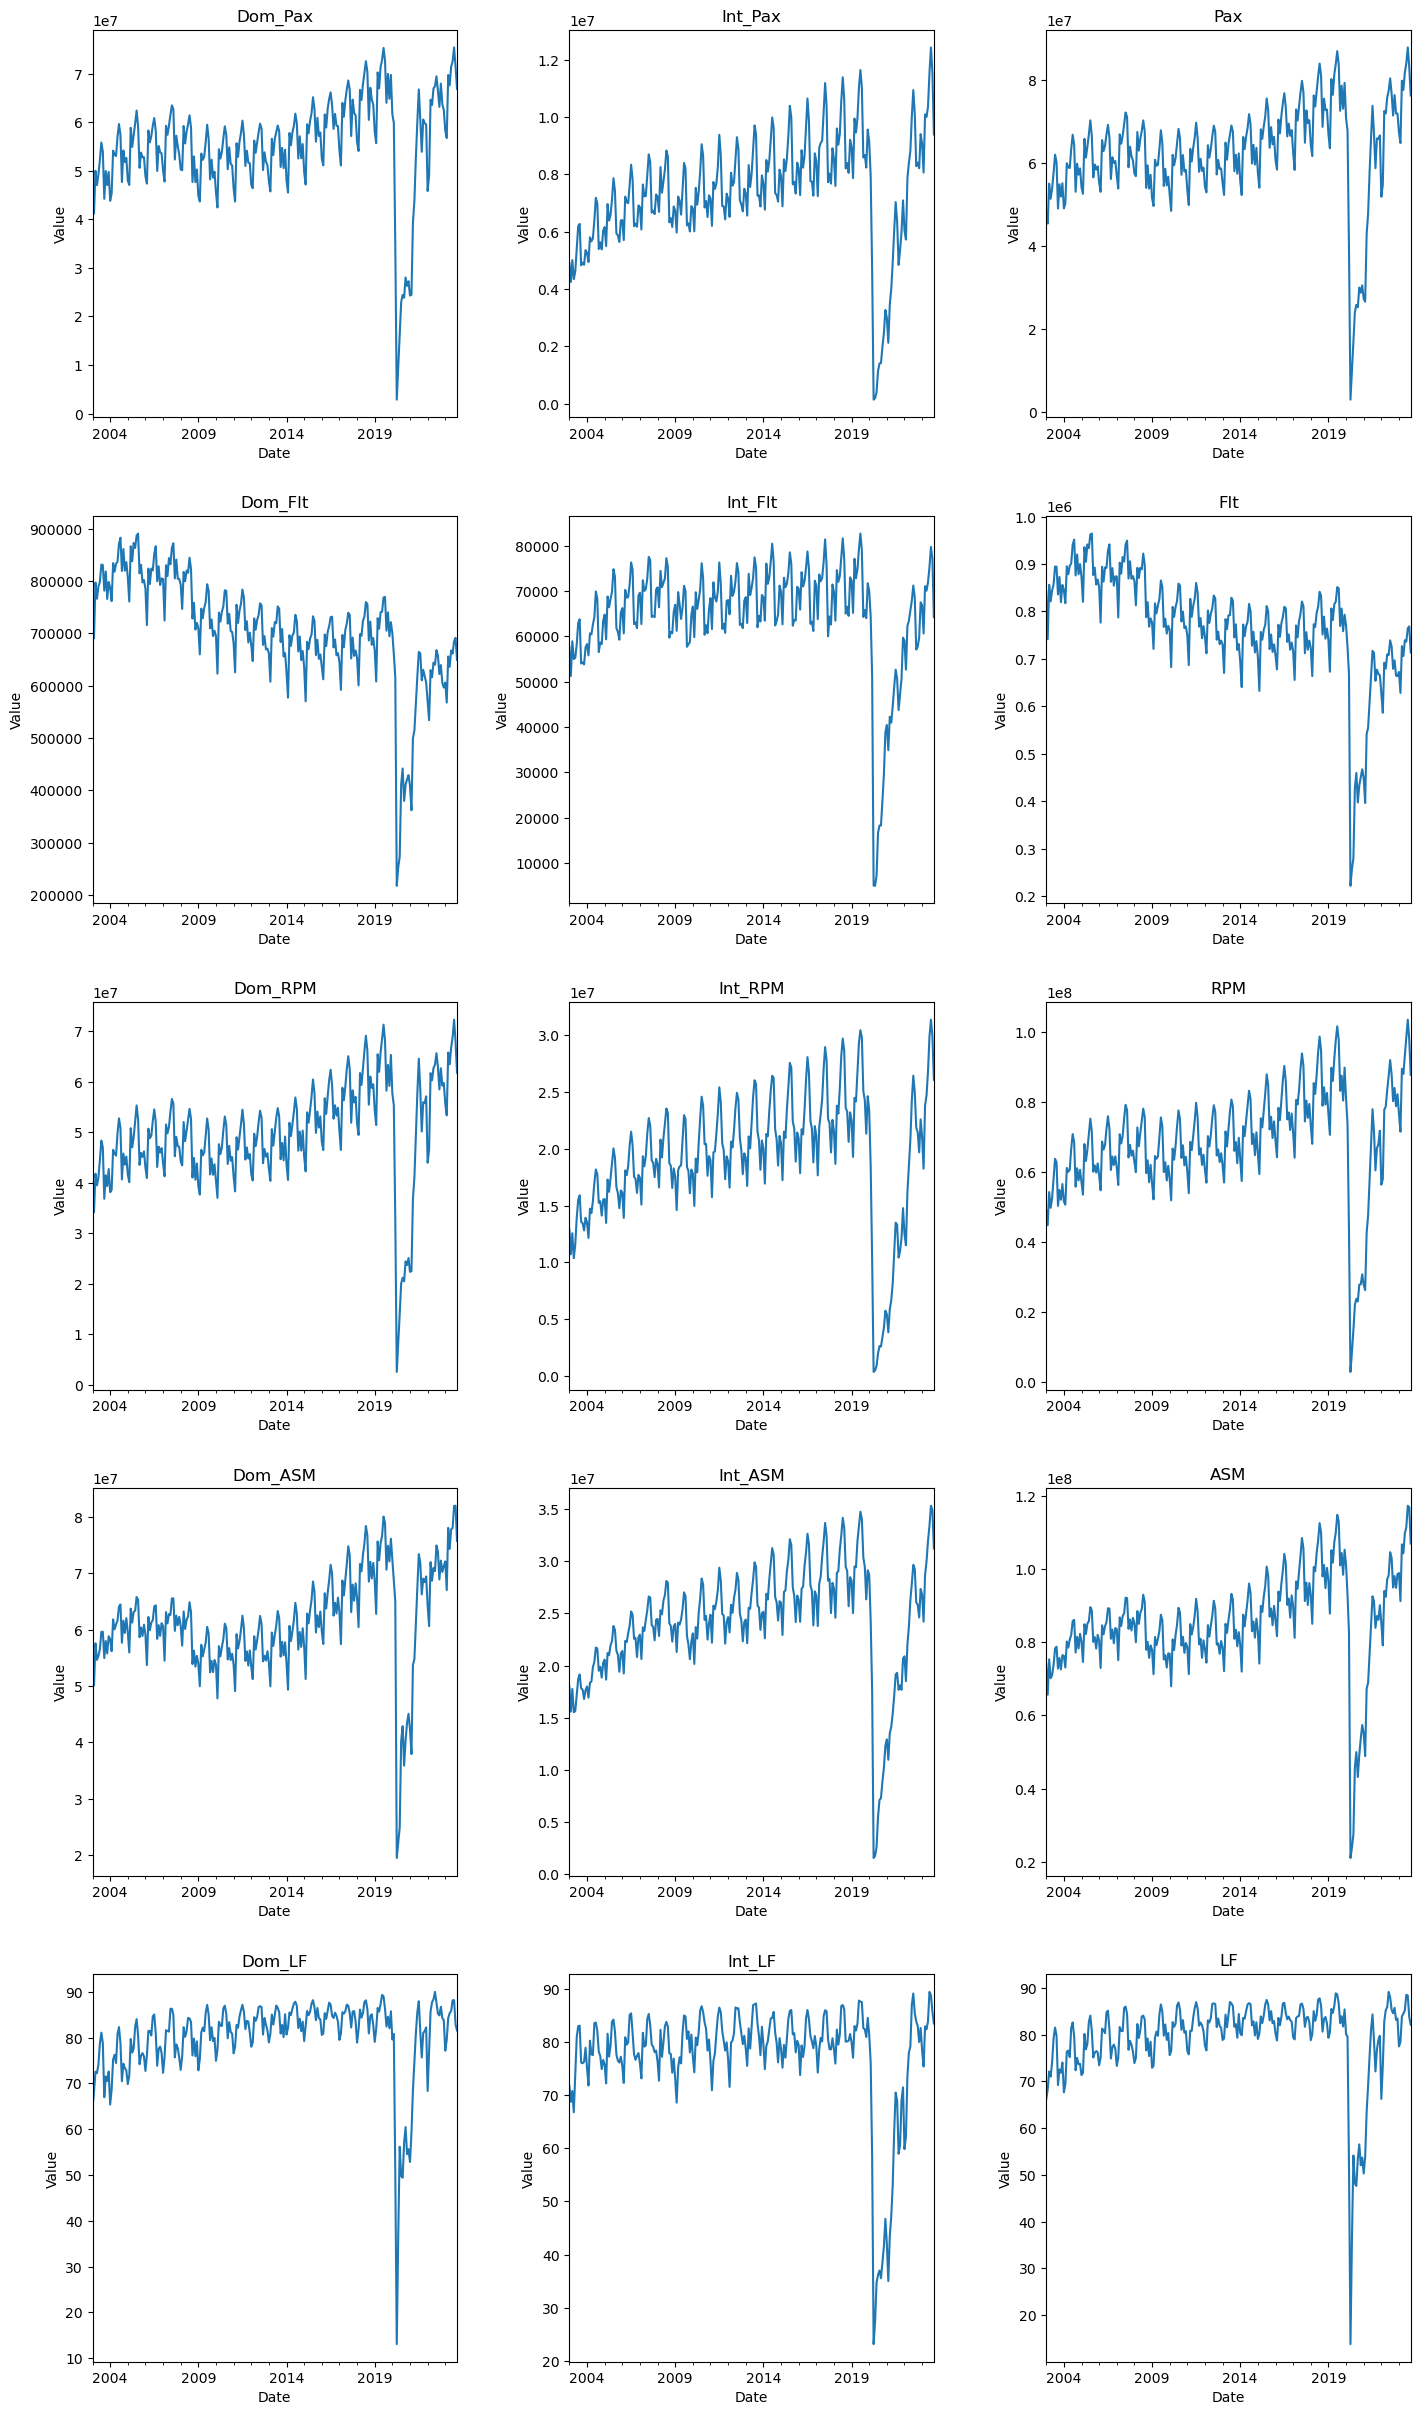

In [11]:
# This is every feature of the dataset plotted with a timeseries line chart

columns_to_plot = df.columns.drop(['Date', 'Year', 'Month'])

n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))
fig.tight_layout(pad=5.0)

for i, column in enumerate(columns_to_plot):
    ax = axes[i // n_cols, i % n_cols]
    df.plot(x='Date', y=column, ax=ax, legend=False)
    ax.set_title(column)
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')

for j in range(i + 1, n_rows * n_cols):
    axes[j // n_cols, j % n_cols].axis('off')

plt.show()

# What we find is a significant drop off in every category, not surpirsingly, around the time of 2020

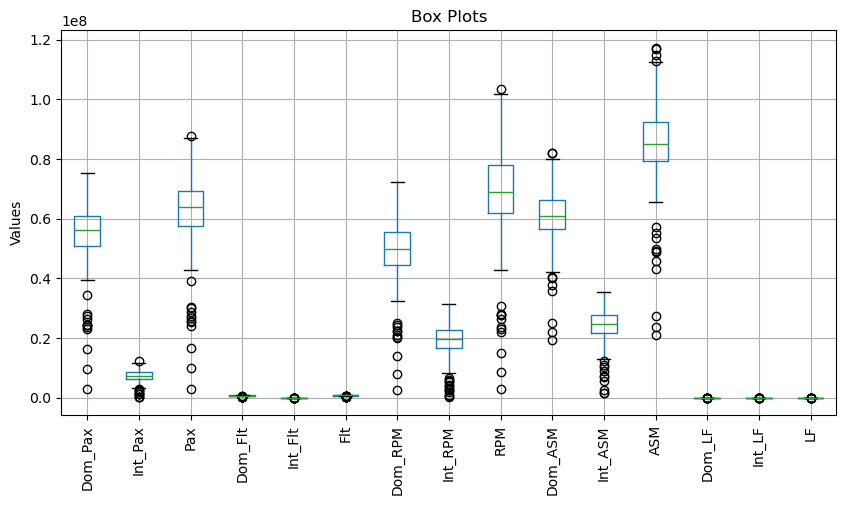

In [12]:
# Significant outliers in several features

data_to_plot = df[columns_to_plot]

data_to_plot.boxplot(figsize=(10, 5))
plt.title('Box Plots')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

# Internal Feature Engineering
My goal here is to synthesize the existing data into more complex features for a potential future ML model.
I will attempt: 
- 'had_holiday' a boolean which indicates holidays in a month
- 'yearly_growth' a measure of year-over-year growth (two columns for pax and flt)
- 'pax_per_flt' a ratio comparing passengers to the number of total flights
- 'dom_to_int' a ratio comparing domestic to international flight totals
- 'dom_int_lf_dif' a ratio comparing the load factor for domestic and international flights
- 'rolling_avg_flt' a rolling average for flight numbers
- 'pandemic' a bool indicating the cdc's definition of an ongoing pandemic
- 'sig_event_count' a tally of the number of significant world events per month (no idea how I'm gonna count that yet)

In [13]:
# 'had_holiday'

us_holidays = holidays.UnitedStates()

def had_holiday(date):
    return date in us_holidays

df['had_holiday'] = df['Date'].apply(had_holiday)
df['had_holiday'].value_counts()

had_holiday
False    225
True      24
Name: count, dtype: int64

In [14]:
# 'yearly_growth'for PAX and FLT percent change

df = df.sort_values(by=['Year', 'Month'])

df['yearly_pax_growth_percent'] = df['Pax'].pct_change(periods=12) * 100  # Multiplying by 100 to get percentage
df['yearly_flt_growth_percent'] = df['Flt'].pct_change(periods=12) * 100

# Replacing NAN values with mean
df['yearly_pax_growth_percent'].fillna(df['yearly_pax_growth_percent'].mean(), inplace=True)
df['yearly_flt_growth_percent'].fillna(df['yearly_pax_growth_percent'].mean(), inplace=True)

In [15]:
# 'Pax per Flt'

df['pax_per_flt'] = df['Pax'] / df['Flt']
df['pax_per_flt'].head()

0    56.877960
1    61.234538
2    64.244864
3    62.560445
4    63.650532
Name: pax_per_flt, dtype: float64

In [16]:
# Dom vs Int flights

df['dom_vs_int_flt'] = df['Dom_Flt'] / df['Int_Flt']
df['dom_vs_int_flt'].head()

0    13.615413
1    13.467898
2    13.528731
3    13.930734
4    14.283851
Name: dom_vs_int_flt, dtype: float64

In [17]:
# Dom LF vs Int LF

df['domlf_vs_intlf'] = df['Dom_LF'] / df['Int_LF']
df['domlf_vs_intlf'].head()

0    0.898619
1    0.991853
2    1.024580
3    1.081611
4    1.000270
Name: domlf_vs_intlf, dtype: float64

In [18]:
# Flight total 3-month rolling average

df['flt_rolling_avg'] = round(df['Flt'].rolling(window=3).mean(),2)
df['flt_rolling_avg'].fillna(round(df['flt_rolling_avg'].mean(),2), inplace=True) # Fill NAN with Average
df['flt_rolling_avg'].head()

0    771494.90
1    771494.90
2    813519.00
3    806331.67
4    840682.33
Name: flt_rolling_avg, dtype: float64

In [19]:
# Passenger total 3-month rolling average

df['pax_rolling_avg'] = round(df['Pax'].rolling(window=3).mean(),2)
df['pax_rolling_avg'].fillna(round(df['pax_rolling_avg'].mean(),2), inplace=True) # Fill NAN with Average
df['pax_rolling_avg'].head()

0    62600259.06
1    62600259.06
2    49450579.67
3    50597387.67
4    53381067.67
Name: pax_rolling_avg, dtype: float64

In [20]:
# Pax Rolling Average vs Flt Rolling Average

df['pax_RA_vs_flt_RA'] = df['pax_rolling_avg'] / df['flt_rolling_avg']
df['pax_RA_vs_flt_RA'].head()

0    81.141507
1    81.141507
2    60.786017
3    62.750093
4    63.497311
Name: pax_RA_vs_flt_RA, dtype: float64

In [21]:
# During Pandemic? Jan 20th 2020 (First documented US case) - May 11th 2023

pandemic_start = pd.to_datetime('2020-01-20')
pandemic_end = pd.to_datetime('2023-05-11')

df['during_pandemic'] = df['Date'].between(pandemic_start, pandemic_end)
df['during_pandemic'].iloc[-7]

True

# Merging External Data
Specifically, I'm looking for significant world events per month, flight accident data, and economic data.

In [22]:
# Printing df for reference

df.tail()

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,...,had_holiday,yearly_pax_growth_percent,yearly_flt_growth_percent,pax_per_flt,dom_vs_int_flt,domlf_vs_intlf,flt_rolling_avg,pax_rolling_avg,pax_RA_vs_flt_RA,during_pandemic
244,2023,5,71423653,10358666,81782319,667331,71924,739255,66743565,26805432,...,False,7.924224,4.164729,110.628023,9.278280,1.022288,724135.00,79721892.67,110.092583,True
245,2023,6,72482621,11544505,84027126,661293,75279,736572,68789127,29883465,...,False,8.573207,4.018257,114.078632,8.784561,0.985353,727355.00,81129888.00,111.540978,False
246,2023,7,75378157,12432615,87810772,684939,79738,764677,72267904,31376000,...,False,9.251082,3.458041,114.833808,8.589869,0.992457,746834.67,84540072.33,113.197841,False
247,2023,8,71477988,11572149,83050137,691482,77137,768619,67933484,29938507,...,False,8.369619,5.852889,108.051111,8.964336,0.966068,756622.67,84962678.33,112.292007,False
248,2023,9,66858490,9392985,76251475,649308,64241,713549,61777546,26076318,...,False,6.754472,5.028202,106.862283,10.107377,0.976883,748948.33,82370794.67,109.981946,False


In [23]:
# The GDELT project collects "world event" data going back to 1979. I collected and counted the number of events
# per month using the following SQL query in Google Big Query.

# First I'll import it.
event_df = pd.read_csv('/Users/caseyfranco/Desktop/Data Science Resources/Google Data Analytics Capstone/Air Traffic 2003-2023/Data/GDELT-World-Event-Count-2003-2023.csv')
event_df.tail()

,EventYear,EventMonth,NumberOfEvents
244,2023,5,4519357
245,2023,6,4180606
246,2023,7,3818786
247,2023,8,3978330
248,2023,9,3960510


In [24]:
# Now I'll merge the existing data together with the counted event data on the 'month' and 'year' columns.

# Merge the two dataframes on Year and Month columns
df_1 = pd.merge(df, event_df, left_on=['Year', 'Month'], right_on=['EventYear', 'EventMonth'])
df_1.drop(columns=['EventYear', 'EventMonth'], inplace=True)
df_1.tail()

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,...,yearly_pax_growth_percent,yearly_flt_growth_percent,pax_per_flt,dom_vs_int_flt,domlf_vs_intlf,flt_rolling_avg,pax_rolling_avg,pax_RA_vs_flt_RA,during_pandemic,NumberOfEvents
244,2023,5,71423653,10358666,81782319,667331,71924,739255,66743565,26805432,...,7.924224,4.164729,110.628023,9.278280,1.022288,724135.00,79721892.67,110.092583,True,4519357
245,2023,6,72482621,11544505,84027126,661293,75279,736572,68789127,29883465,...,8.573207,4.018257,114.078632,8.784561,0.985353,727355.00,81129888.00,111.540978,False,4180606
246,2023,7,75378157,12432615,87810772,684939,79738,764677,72267904,31376000,...,9.251082,3.458041,114.833808,8.589869,0.992457,746834.67,84540072.33,113.197841,False,3818786
247,2023,8,71477988,11572149,83050137,691482,77137,768619,67933484,29938507,...,8.369619,5.852889,108.051111,8.964336,0.966068,756622.67,84962678.33,112.292007,False,3978330
248,2023,9,66858490,9392985,76251475,649308,64241,713549,61777546,26076318,...,6.754472,5.028202,106.862283,10.107377,0.976883,748948.33,82370794.67,109.981946,False,3960510


SELECT 
    CAST(SUBSTR(CAST(SQLDATE AS STRING), 1, 4) AS INT64) AS EventYear,
    CAST(SUBSTR(CAST(SQLDATE AS STRING), 5, 2) AS INT64) AS EventMonth,
    COUNT(*) AS NumberOfEvents
FROM 
    `gdelt-bq.full.events`
WHERE 
    SQLDATE >= 20030101 AND SQLDATE < 20231001
GROUP BY 
    EventYear, EventMonth
ORDER BY 
    EventYear, EventMonth;

In [25]:
# Found https://www.ntsb.gov which allowed me to download a CSV of accident data.
# Now importing, creating Year and Month columns for merging, then creating a pivot table to display
# All types of accidents plus a Total column for each month.

full_accident_df = pd.read_csv('/Users/caseyfranco/Desktop/Data Science Resources/Google Data Analytics Capstone/Air Traffic 2003-2023/Data/Aviation-Accident-Query-NTSB_gov.csv')

full_accident_df['EventDate'] = pd.to_datetime(full_accident_df['EventDate'])

full_accident_df['Year'] = full_accident_df['EventDate'].dt.year
full_accident_df['Month'] = full_accident_df['EventDate'].dt.month

accident_pivot_table = full_accident_df.pivot_table(
    index=['Year', 'Month'], 
    columns='HighestInjuryLevel', 
    values='NtsbNo',
    aggfunc='count', 
    fill_value=0
)

accident_pivot_table['Total Injuries'] = accident_pivot_table.sum(axis=1)
accident_pivot_table.head()

HighestInjuryLevel  Fatal  Minor  Serious  Total Injuries
Year Month                                               
2003 1                 37     15       21              73
     2                 23     21       11              55
     3                 36     19       18              73
     4                 29     22       20              71
     5                 27     31       14              72

In [26]:
# And now to merge the new pivot table with the existing data...

df_2 = pd.merge(df_1, accident_pivot_table, on=['Year', 'Month'], how='left')
df_2.tail()

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,...,domlf_vs_intlf,flt_rolling_avg,pax_rolling_avg,pax_RA_vs_flt_RA,during_pandemic,NumberOfEvents,Fatal,Minor,Serious,Total Injuries
244,2023,5,71423653,10358666,81782319,667331,71924,739255,66743565,26805432,...,1.022288,724135.00,79721892.67,110.092583,True,4519357,26,16,18,60
245,2023,6,72482621,11544505,84027126,661293,75279,736572,68789127,29883465,...,0.985353,727355.00,81129888.00,111.540978,False,4180606,29,21,19,69
246,2023,7,75378157,12432615,87810772,684939,79738,764677,72267904,31376000,...,0.992457,746834.67,84540072.33,113.197841,False,3818786,38,31,33,102
247,2023,8,71477988,11572149,83050137,691482,77137,768619,67933484,29938507,...,0.966068,756622.67,84962678.33,112.292007,False,3978330,32,19,17,68
248,2023,9,66858490,9392985,76251475,649308,64241,713549,61777546,26076318,...,0.976883,748948.33,82370794.67,109.981946,False,3960510,19,20,16,55


In [27]:
# I found short term key economic indicator data from the G7 by month 03-23 from OECD.
# Importing, dropping all columns but date and values, converting date to Year and Month, and merging.

# Import economic data
full_economic_data = pd.read_csv('/Users/caseyfranco/Desktop/Data Science Resources/Google Data Analytics Capstone/Air Traffic 2003-2023/Data/OECD_Economic_Indicators_G7_2003_2023.csv')

# Drop all but date and observation columns, convert date to datetime
economic_cols_to_keep = ['TIME_PERIOD','OBS_VALUE']
full_economic_data = full_economic_data.drop([col for col in full_economic_data.columns if col not in economic_cols_to_keep], axis=1)
full_economic_data['TIME_PERIOD'] = pd.to_datetime(full_economic_data['TIME_PERIOD'], format='%Y-%m')

# Split datetime into Year and Month
full_economic_data['Year'] = full_economic_data['TIME_PERIOD'].dt.year
full_economic_data['Month'] = full_economic_data['TIME_PERIOD'].dt.month

# Drop TIME_PERIOD, rename Observations
full_economic_data.drop('TIME_PERIOD', axis=1, inplace=True)
full_economic_data.rename({'OBS_VALUE': 'economic_indicator'}, axis=1, inplace=True)
full_economic_data.tail()

# Merge on Year and Month
dfx = pd.merge(df_2, full_economic_data, on=['Year', 'Month'], how='left')

In [28]:
# All external data loaded! Now displaying complete DF as DFX
dfx.tail()

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,...,flt_rolling_avg,pax_rolling_avg,pax_RA_vs_flt_RA,during_pandemic,NumberOfEvents,Fatal,Minor,Serious,Total Injuries,economic_indicator
244,2023,5,71423653,10358666,81782319,667331,71924,739255,66743565,26805432,...,724135.00,79721892.67,110.092583,True,4519357,26,16,18,60,100.078858
245,2023,6,72482621,11544505,84027126,661293,75279,736572,68789127,29883465,...,727355.00,81129888.00,111.540978,False,4180606,29,21,19,69,100.340882
246,2023,7,75378157,12432615,87810772,684939,79738,764677,72267904,31376000,...,746834.67,84540072.33,113.197841,False,3818786,38,31,33,102,100.175677
247,2023,8,71477988,11572149,83050137,691482,77137,768619,67933484,29938507,...,756622.67,84962678.33,112.292007,False,3978330,32,19,17,68,100.120864
248,2023,9,66858490,9392985,76251475,649308,64241,713549,61777546,26076318,...,748948.33,82370794.67,109.981946,False,3960510,19,20,16,55,99.947143


# Visualization Round 2
Now that I've added new features and brought in external data for reference, I'll visualize everything to confrim trends and check for outliers

In [29]:
# First and foremost, need to encode the boolean columns as ints

for col in dfx.columns:
    if dfx[col].dtype == 'bool':
        dfx[col] = dfx[col].astype(int)

In [30]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Year                       249 non-null    int64         
 1   Month                      249 non-null    int64         
 2   Dom_Pax                    249 non-null    int64         
 3   Int_Pax                    249 non-null    int64         
 4   Pax                        249 non-null    int64         
 5   Dom_Flt                    249 non-null    int64         
 6   Int_Flt                    249 non-null    int64         
 7   Flt                        249 non-null    int64         
 8   Dom_RPM                    249 non-null    int64         
 9   Int_RPM                    249 non-null    int64         
 10  RPM                        249 non-null    int64         
 11  Dom_ASM                    249 non-null    int64         
 12  Int_ASM 

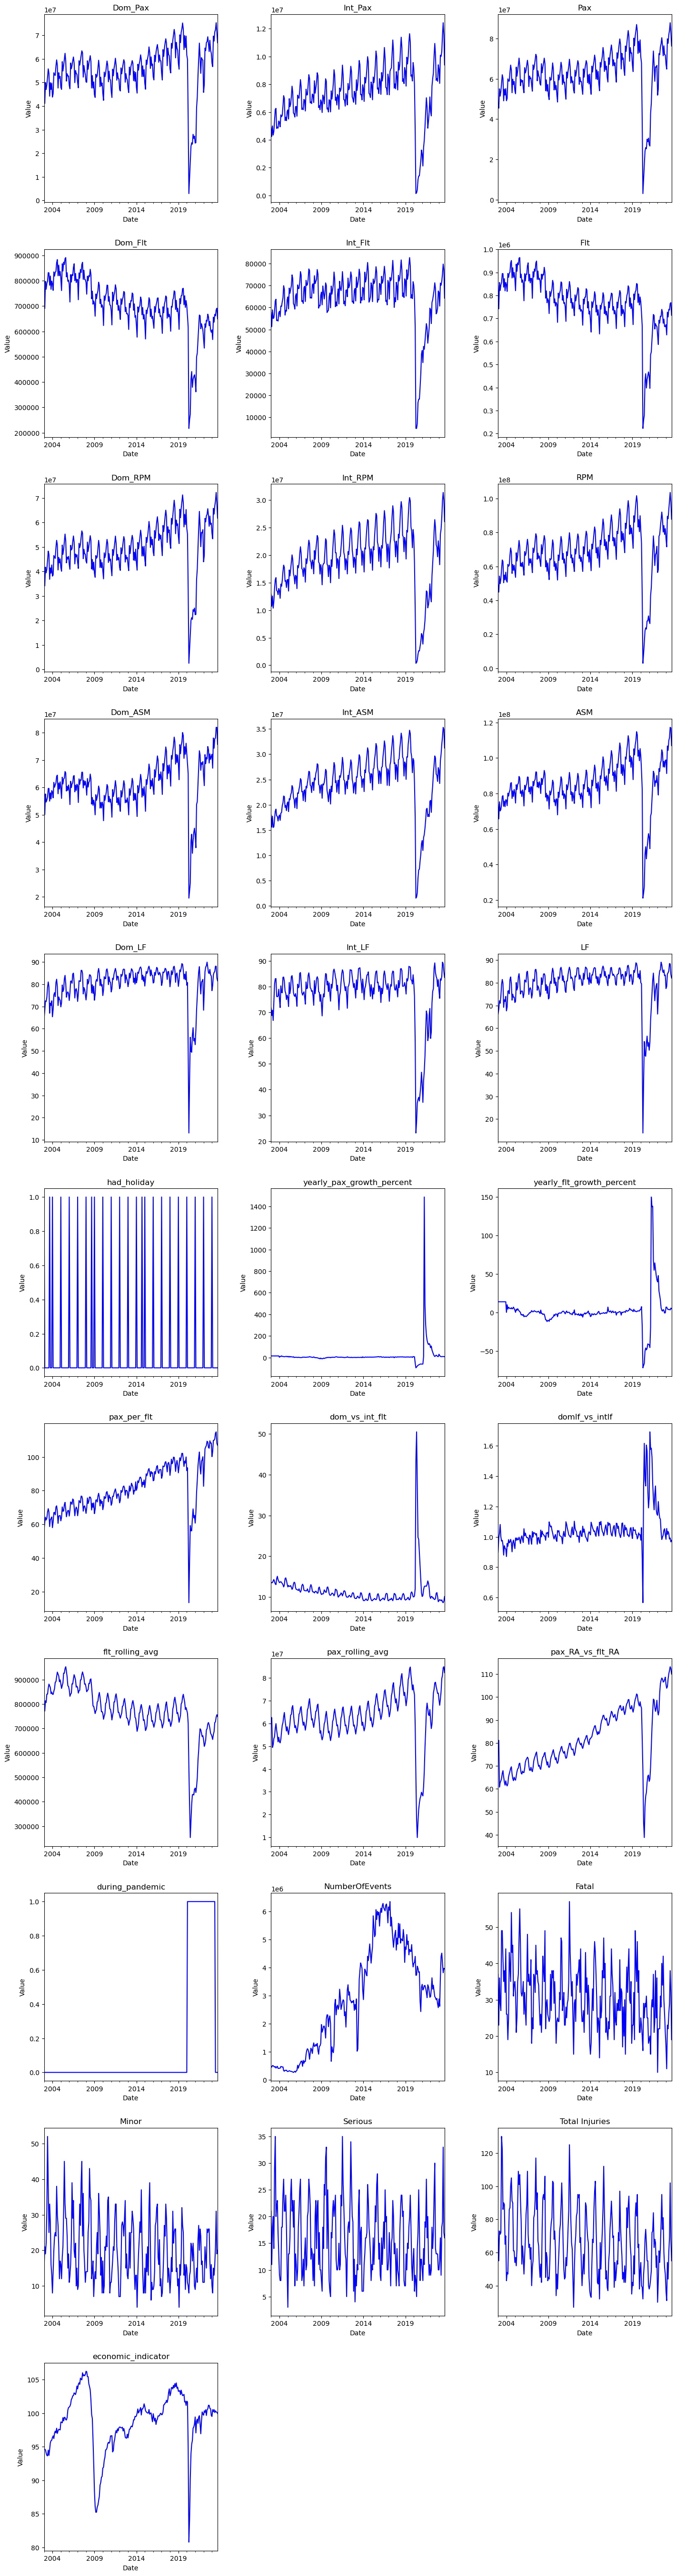

In [31]:
# Line charts of all numeric columns

columns_to_plot = dfx.columns.drop(['Date', 'Year', 'Month'])

n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))
fig.tight_layout(pad=5.0)

for i, column in enumerate(columns_to_plot):
    ax = axes[i // n_cols, i % n_cols]
    
    dfx.plot(x='Date', y=column, ax=ax, legend=False, color='blue')

    ax.set_title(column)
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')

for j in range(i + 1, n_rows * n_cols):
    axes[j // n_cols, j % n_cols].axis('off')

plt.show()

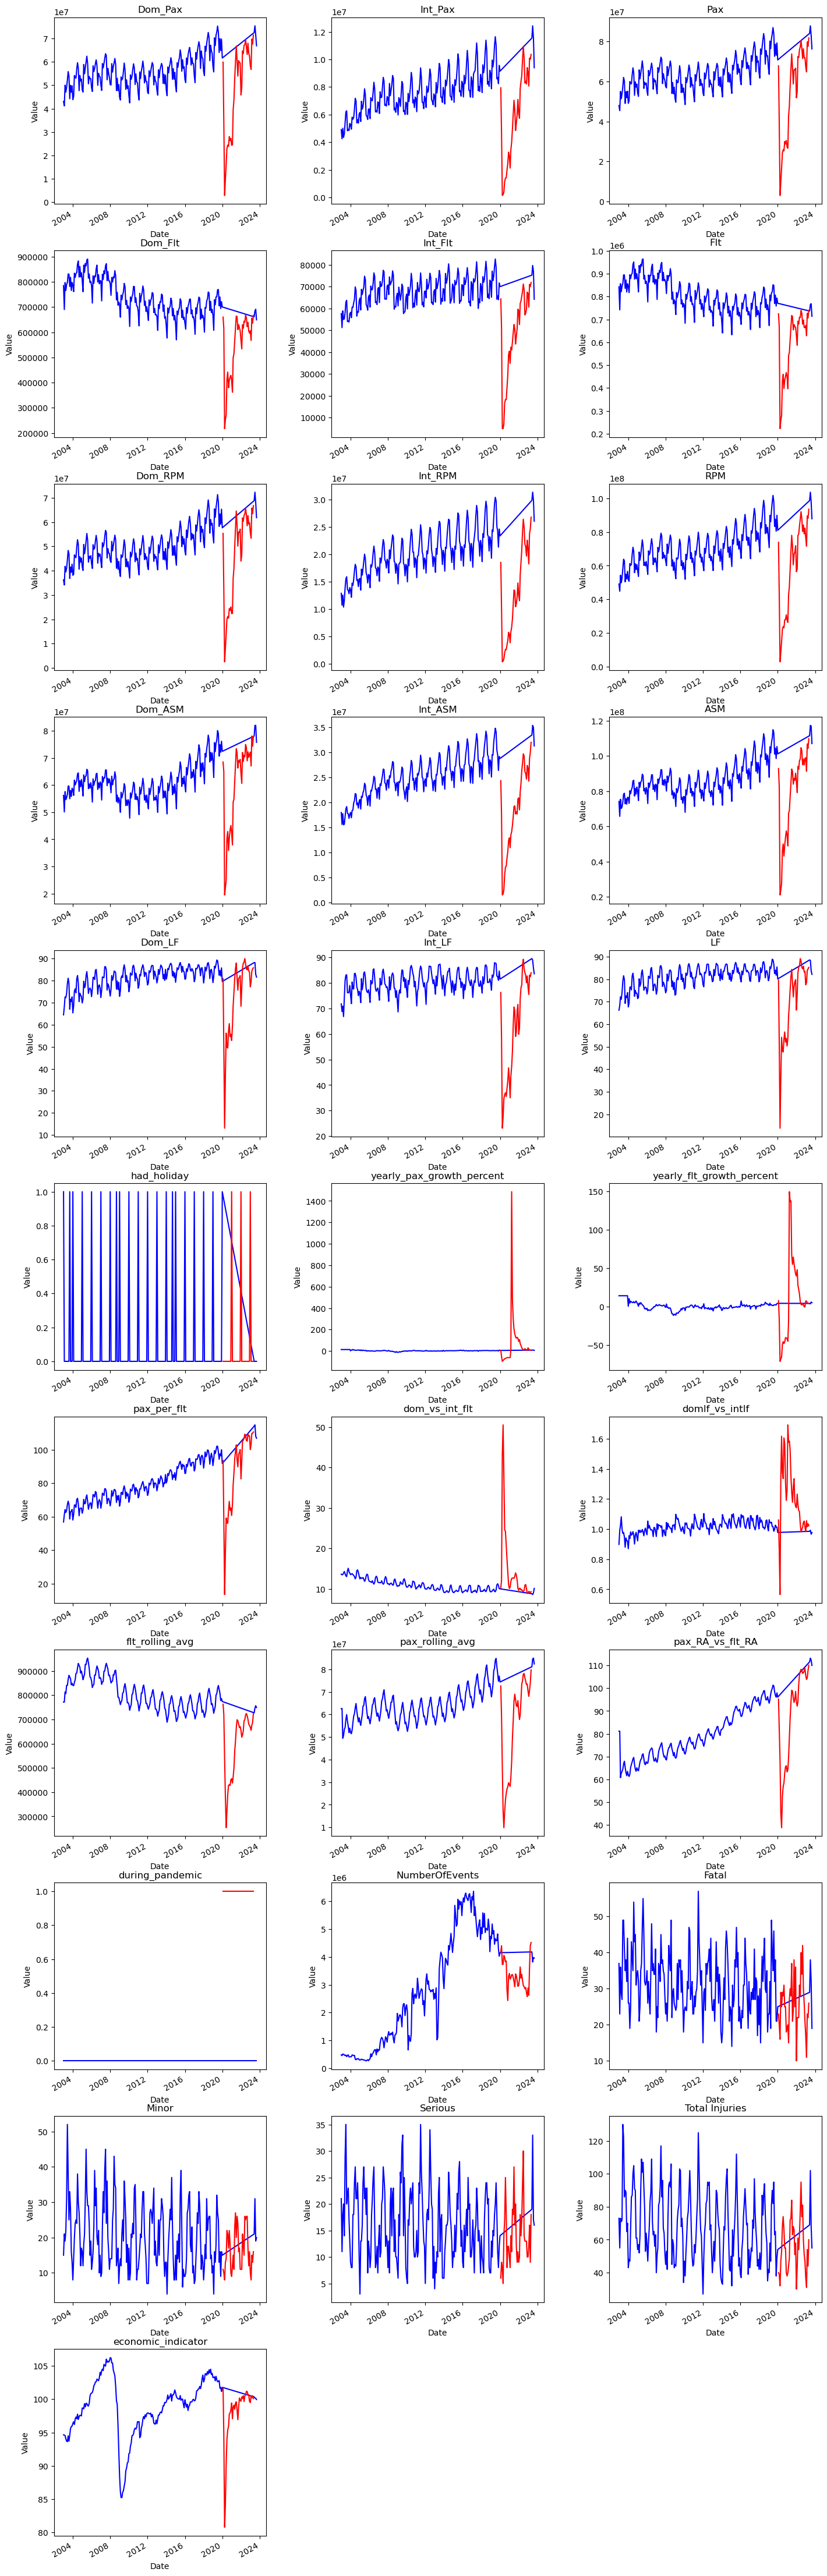

In [32]:
# The same line charts highlighting the pandemic period

columns_to_plot = dfx.columns.drop(['Date', 'Year', 'Month'])

n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))
fig.tight_layout(pad=5.0)

for i, column in enumerate(columns_to_plot):
    ax = axes[i // n_cols, i % n_cols]
    
    dfx[dfx['during_pandemic'] == False].plot(x='Date', y=column, ax=ax, legend=False, color='blue')
    dfx[dfx['during_pandemic'] == True].plot(x='Date', y=column, ax=ax, legend=False, color='red')

    ax.set_title(column)
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')

for j in range(i + 1, n_rows * n_cols):
    axes[j // n_cols, j % n_cols].axis('off')

plt.show()

# EDA v2 + Corr + Corr Vis
I'm going to run some simple statistical analysis again, then a few types of corr() tests, then I'll do a heatmap with the most insightful type of corr().

In [33]:
# First a simple describe:

dfx.describe()

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,...,flt_rolling_avg,pax_rolling_avg,pax_RA_vs_flt_RA,during_pandemic,NumberOfEvents,Fatal,Minor,Serious,Total Injuries,economic_indicator
count,249.000000,249.000000,2.490000e+02,2.490000e+02,2.490000e+02,249.000000,249.000000,249.000000,2.490000e+02,2.490000e+02,...,249.000000,2.490000e+02,249.000000,249.000000,2.490000e+02,249.000000,249.000000,249.000000,249.000000,249.000000
mean,2012.879518,6.445783,5.520971e+07,7.392209e+06,6.260192e+07,706750.710843,64736.172691,771486.883534,4.957803e+07,1.918103e+07,...,771494.900241,6.260026e+07,81.350013,0.160643,2.874703e+06,30.554217,19.763052,15.795181,66.112450,98.836045
min,2003.000000,1.000000,2.877290e+06,1.366090e+05,3.013899e+06,217262.000000,4996.000000,222280.000000,2.551127e+06,3.567620e+05,...,253327.330000,9.837640e+06,38.833710,0.000000,2.647530e+05,10.000000,4.000000,3.000000,27.000000,80.796771
25%,2008.000000,3.000000,5.098217e+07,6.395022e+06,5.766458e+07,662000.000000,61615.000000,727898.000000,4.458029e+07,1.660284e+07,...,729319.000000,5.828683e+07,70.740061,0.000000,1.069607e+06,24.000000,13.000000,11.000000,50.000000,97.021925
50%,2013.000000,6.000000,5.620010e+07,7.419187e+06,6.389913e+07,709933.000000,66557.000000,779011.000000,4.985794e+07,1.968901e+07,...,778056.670000,6.334769e+07,79.188923,0.000000,2.862259e+06,30.000000,18.000000,15.000000,64.000000,99.519252
75%,2018.000000,9.000000,6.089213e+07,8.567847e+06,6.944743e+07,781804.000000,71924.000000,848650.000000,5.568257e+07,2.266760e+07,...,840834.330000,6.834283e+07,92.732329,0.000000,4.404396e+06,36.000000,25.000000,20.000000,81.000000,101.354492
max,2023.000000,12.000000,7.537816e+07,1.243262e+07,8.781077e+07,890938.000000,82681.000000,964102.000000,7.226790e+07,3.137600e+07,...,953080.000000,8.496268e+07,113.197841,1.000000,6.359816e+06,57.000000,52.000000,35.000000,130.000000,106.226908
std,6.002817,3.442803,1.044055e+07,2.020273e+06,1.229211e+07,107054.971522,12129.622461,115686.728629,1.035558e+07,5.711621e+06,...,110086.392614,1.142154e+07,13.622586,0.367941,1.850070e+06,8.574041,8.808679,6.581546,20.668354,4.279980


In [34]:
# Now my "Super Describe"

dfx_drop_dates_bools = ['Date', 'Year', 'Month']
dfx_numeric = dfx.drop(dfx_drop_dates_bools, axis=1)

means = round(dfx_numeric.mean(), 2)
medians = dfx_numeric.median()
std_devs = round(dfx_numeric.std(), 2)
variations = round(dfx_numeric.var(), 2)
skew = dfx_numeric.skew()
co_of_v = (dfx_numeric.std() / dfx_numeric.mean()) * 100
mean_med_dif = dfx_numeric.mean() - dfx_numeric.median()
kurt = dfx_numeric.kurtosis()

summary_dfx = pd.DataFrame({
    'Mean': means, # Average value of the dataset
    'Median': medians, # Middle value when data is sorted
    'Standard Deviation': std_devs, # Measures spread of data around the mean
    'Variation': variations, # Average of squared differences from the mean
    'Skewness': skew, # Indicates asymmetry of data distribution
    'Coefficient of Variation %': co_of_v, # Standard deviation relative to the mean (percentage)
    'Mean-Median Difference': mean_med_dif, # Indicates skewness direction and magnitude
    'Kurtosis': kurt # Measures tail heaviness of the distribution
})
summary_dfx

,Mean,Median,Standard Deviation,Variation,Skewness,Coefficient of Variation %,Mean-Median Difference,Kurtosis
Dom_Pax,55209709.91,5.620010e+07,10440552.12,1.090051e+14,-1.577793,18.910717,-9.903941e+05,4.947082
Int_Pax,7392209.44,7.419187e+06,2020273.17,4.081504e+12,-0.799335,27.329761,-2.697756e+04,1.937932
Pax,62601919.35,6.389913e+07,12292114.52,1.510961e+14,-1.488638,19.635364,-1.297211e+06,4.585726
Dom_Flt,706750.71,7.099330e+05,107054.97,1.146077e+10,-1.469840,15.147487,-3.182289e+03,4.081890
Int_Flt,64736.17,6.655700e+04,12129.62,1.471277e+08,-2.455673,18.737009,-1.820827e+03,8.323124
Flt,771486.88,7.790110e+05,115686.73,1.338342e+10,-1.738745,14.995294,-7.524116e+03,5.128998
Dom_RPM,49578034.17,4.985794e+07,10355583.12,1.072381e+14,-1.001559,20.887442,-2.799028e+05,2.988005
Int_RPM,19181026.78,1.968901e+07,5711621.10,3.262262e+13,-0.897588,29.777452,-5.079792e+05,1.505328
RPM,68759060.96,6.900519e+07,15488747.28,2.399013e+14,-1.036702,22.526118,-2.461250e+05,2.869725
Dom_ASM,61318217.15,6.088909e+07,8996673.01,8.094013e+13,-0.909883,14.672105,4.291311e+05,3.672872


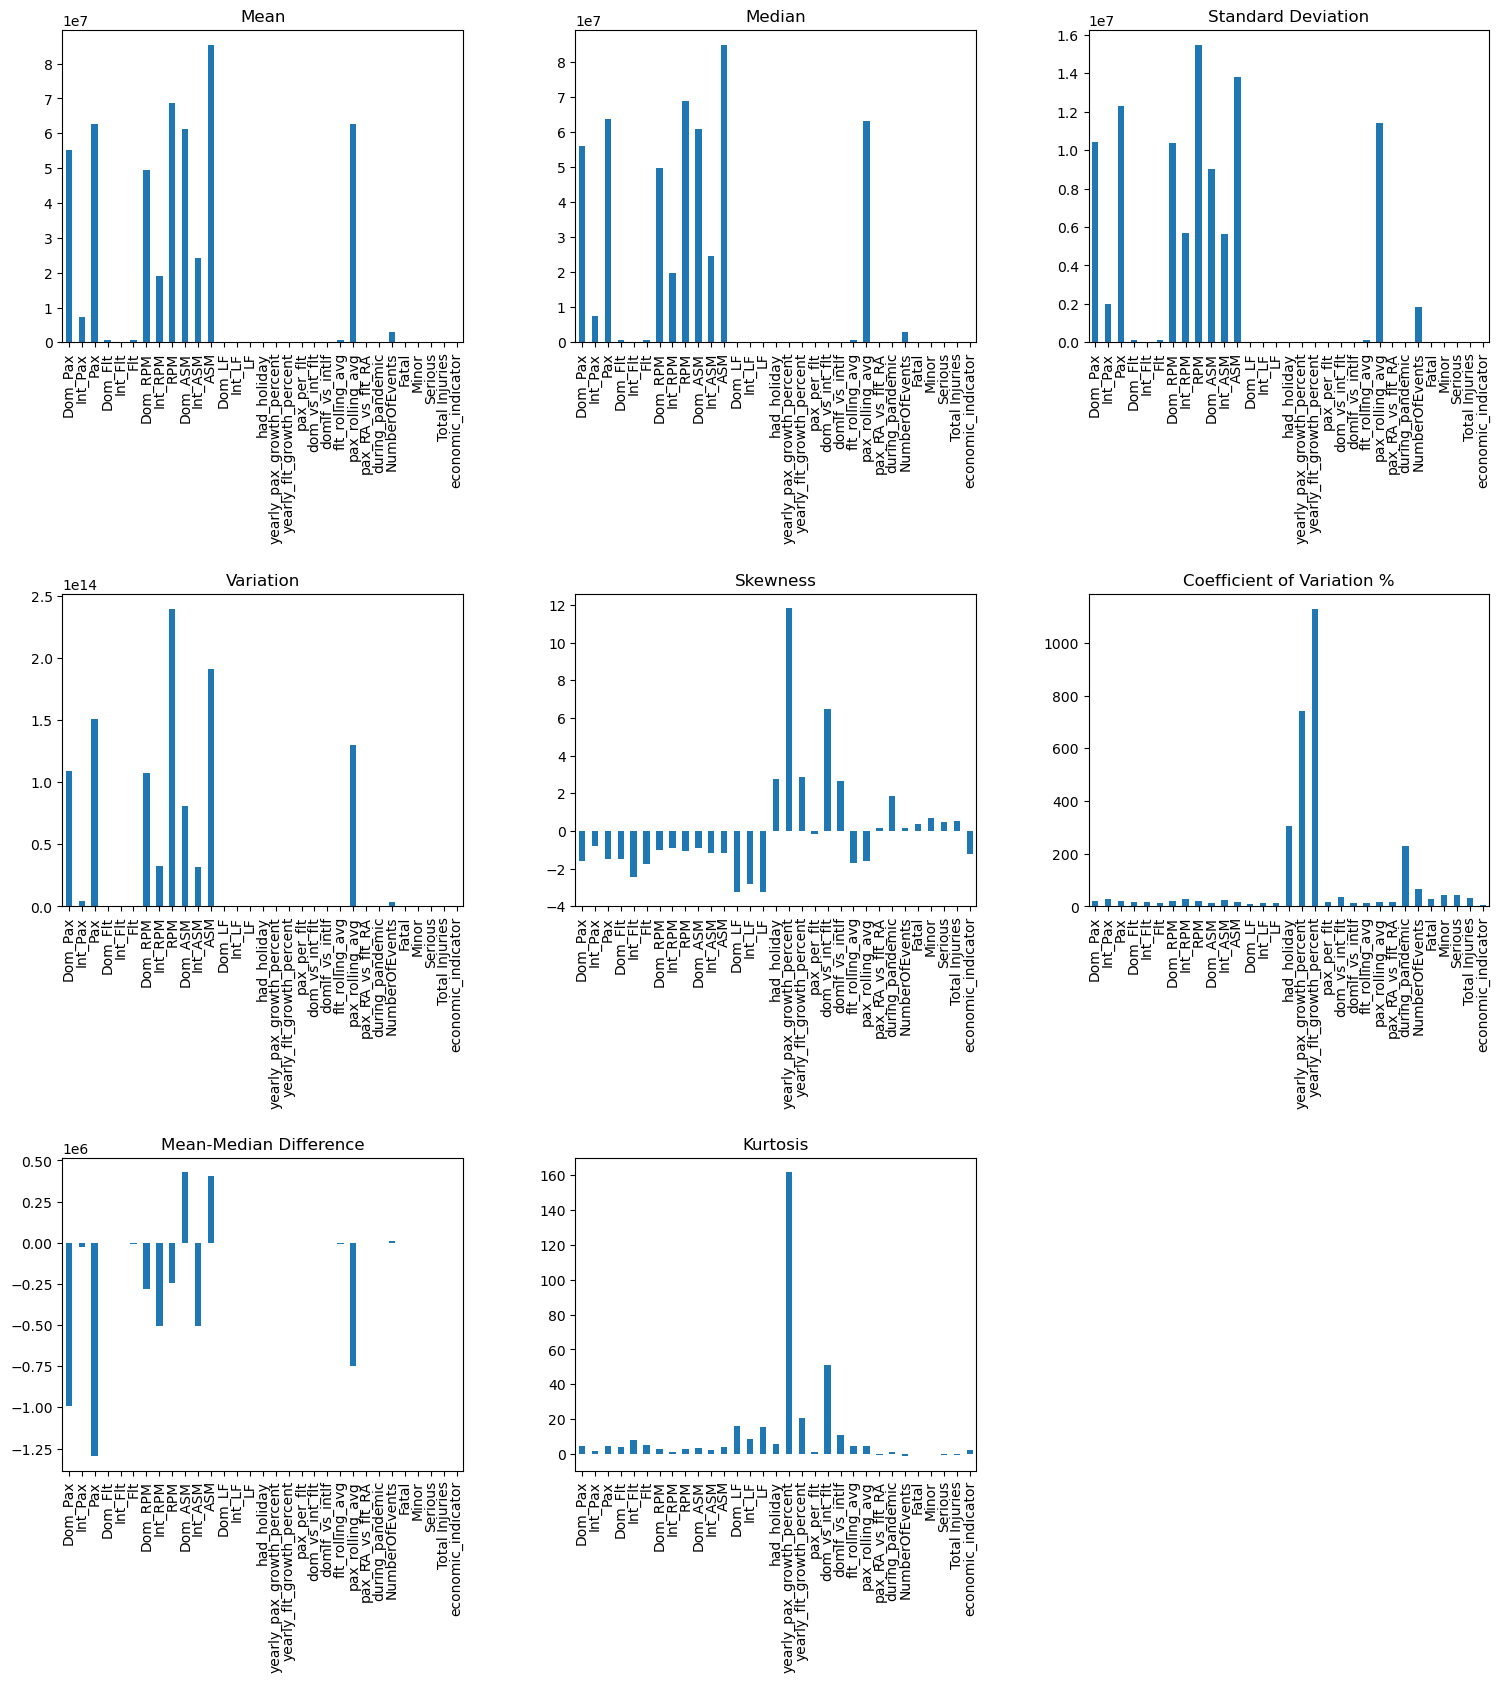

In [35]:
# Visualizing new summary stats with histograms

num_columns = len(summary_dfx.columns)

cols = 3
rows = math.ceil(num_columns / cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, rows * 5))
fig.tight_layout(w_pad=5.0, h_pad=16.0)

for i, column in enumerate(summary_dfx.columns):
    ax = axes[i // cols, i % cols] if rows > 1 else axes[i % cols]
    summary_dfx[column].plot(kind='bar', ax=ax, title=column)

for j in range(i + 1, rows * cols):
    if rows > 1:
        fig.delaxes(axes[j // cols, j % cols])
    else:
        fig.delaxes(axes[j % cols])

plt.show()

In [36]:
# Now for some corr(), first Pearson

dfx_corr_pearson = dfx_numeric.corr('pearson', numeric_only=True)
dfx_corr_pearson

,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,...,flt_rolling_avg,pax_rolling_avg,pax_RA_vs_flt_RA,during_pandemic,NumberOfEvents,Fatal,Minor,Serious,Total Injuries,economic_indicator
Dom_Pax,1.000000,0.901007,0.997455,0.536986,0.812140,0.582072,0.988025,0.855402,0.976018,0.936302,...,0.479594,0.905486,0.709245,-0.264876,0.260257,0.284402,0.288506,0.294644,0.334765,0.509437
Int_Pax,0.901007,1.000000,0.929643,0.395449,0.887830,0.459031,0.912947,0.970857,0.968397,0.828871,...,0.385226,0.885929,0.739752,-0.328822,0.397367,0.210121,0.219989,0.235475,0.255908,0.442831
Pax,0.997455,0.929643,1.000000,0.521094,0.835727,0.569839,0.989246,0.886118,0.988162,0.931496,...,0.470667,0.914700,0.723993,-0.279022,0.286364,0.276097,0.281204,0.288963,0.326399,0.505482
Dom_Flt,0.536986,0.395449,0.521094,1.000000,0.683664,0.997068,0.421149,0.458516,0.450657,0.427562,...,0.946712,0.477418,-0.139880,-0.659813,-0.491676,0.482843,0.437003,0.348379,0.497485,0.236755
Int_Flt,0.812140,0.887830,0.835727,0.683664,1.000000,0.737502,0.770387,0.888821,0.842832,0.693969,...,0.661098,0.782590,0.429479,-0.597192,0.101304,0.254202,0.243730,0.207487,0.275400,0.414262
Flt,0.582072,0.459031,0.569839,0.997068,0.737502,1.000000,0.470500,0.517497,0.505402,0.468422,...,0.945390,0.523850,-0.084413,-0.673197,-0.444369,0.473469,0.429952,0.344140,0.489242,0.262524
Dom_RPM,0.988025,0.912947,0.989246,0.421149,0.770387,0.470500,1.000000,0.845692,0.980444,0.954935,...,0.365319,0.900333,0.788066,-0.160668,0.351033,0.236349,0.252885,0.269373,0.291602,0.515542
Int_RPM,0.855402,0.970857,0.886118,0.458516,0.888821,0.517497,0.845692,1.000000,0.934179,0.743071,...,0.476335,0.878464,0.645140,-0.469519,0.362224,0.284754,0.271675,0.284854,0.324620,0.389920
RPM,0.976018,0.968397,0.988162,0.450657,0.842832,0.505402,0.980444,0.934179,1.000000,0.912472,...,0.419901,0.925893,0.764793,-0.280560,0.368270,0.263025,0.269259,0.285142,0.314669,0.488472
Dom_ASM,0.936302,0.828871,0.931496,0.427562,0.693969,0.468422,0.954935,0.743071,0.912472,1.000000,...,0.365003,0.874767,0.767291,-0.073851,0.288285,0.191749,0.203512,0.212192,0.233850,0.561391


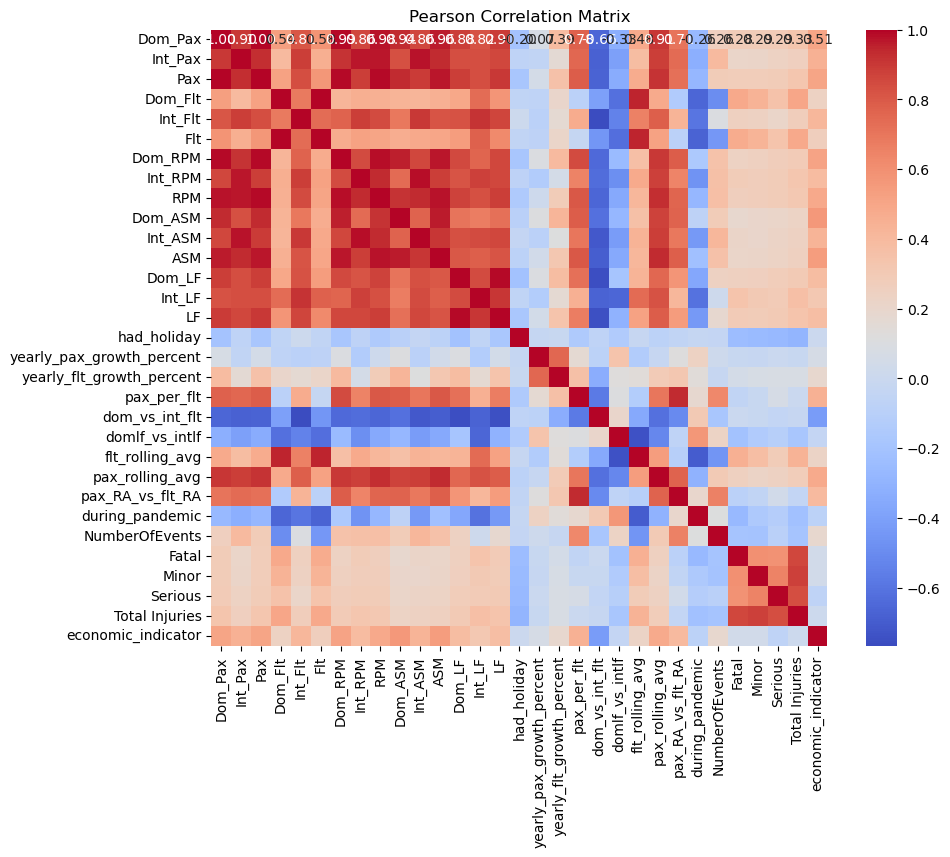

In [37]:
# Pearson Heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(dfx_corr_pearson, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Pearson Correlation Matrix')
plt.show()

In [38]:
# Now kendall corr

dfx_corr_kendall = dfx_numeric.corr('kendall', numeric_only=True)
dfx_corr_kendall

,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,...,flt_rolling_avg,pax_rolling_avg,pax_RA_vs_flt_RA,during_pandemic,NumberOfEvents,Fatal,Minor,Serious,Total Injuries,economic_indicator
Dom_Pax,1.000000,0.661485,0.939824,0.098912,0.497903,0.125858,0.911776,0.607009,0.832491,0.775100,...,0.027044,0.688475,0.535408,-0.021909,0.269141,0.188664,0.237196,0.221148,0.248485,0.373494
Int_Pax,0.661485,1.000000,0.721661,0.017036,0.682450,0.057067,0.702293,0.838904,0.815520,0.554217,...,-0.044080,0.634710,0.581918,-0.152120,0.366304,0.110562,0.151577,0.148679,0.150213,0.315974
Pax,0.939824,0.721661,1.000000,0.086022,0.543700,0.115300,0.928553,0.659800,0.888781,0.751717,...,0.013765,0.708231,0.552444,-0.045312,0.293302,0.180228,0.228436,0.212677,0.237269,0.371615
Dom_Flt,0.098912,0.017036,0.086022,1.000000,0.243008,0.955046,0.028825,0.076694,0.046055,0.104871,...,0.803776,0.010980,-0.329161,-0.481881,-0.425832,0.379866,0.342836,0.279654,0.394297,0.057974
Int_Flt,0.497903,0.682450,0.543700,0.243008,1.000000,0.287963,0.505546,0.656605,0.584833,0.397629,...,0.150802,0.415806,0.281587,-0.358024,0.169876,0.167279,0.210625,0.157914,0.202026,0.280190
Flt,0.125858,0.057067,0.115300,0.955046,0.287963,1.000000,0.056937,0.111672,0.077018,0.134279,...,0.782659,0.032485,-0.303250,-0.485740,-0.400181,0.382304,0.351924,0.284286,0.401404,0.078572
Dom_RPM,0.911776,0.702293,0.928553,0.028825,0.505546,0.056937,1.000000,0.625146,0.863583,0.790517,...,-0.042396,0.713349,0.607699,0.024772,0.315779,0.149185,0.201434,0.191830,0.205707,0.369867
Int_RPM,0.607009,0.838904,0.659800,0.076694,0.656605,0.111672,0.625146,1.000000,0.761562,0.470722,...,0.051724,0.637107,0.541173,-0.253327,0.346418,0.181941,0.205188,0.203742,0.223705,0.274064
RPM,0.832491,0.815520,0.888781,0.046055,0.584833,0.077018,0.863583,0.761562,1.000000,0.685840,...,-0.013506,0.737186,0.598630,-0.077679,0.350887,0.165201,0.208283,0.202419,0.218749,0.356523
Dom_ASM,0.775100,0.554217,0.751717,0.104871,0.397629,0.134279,0.790517,0.470722,0.685840,1.000000,...,0.033651,0.659584,0.529967,0.081538,0.216803,0.127171,0.162708,0.142060,0.163842,0.408991


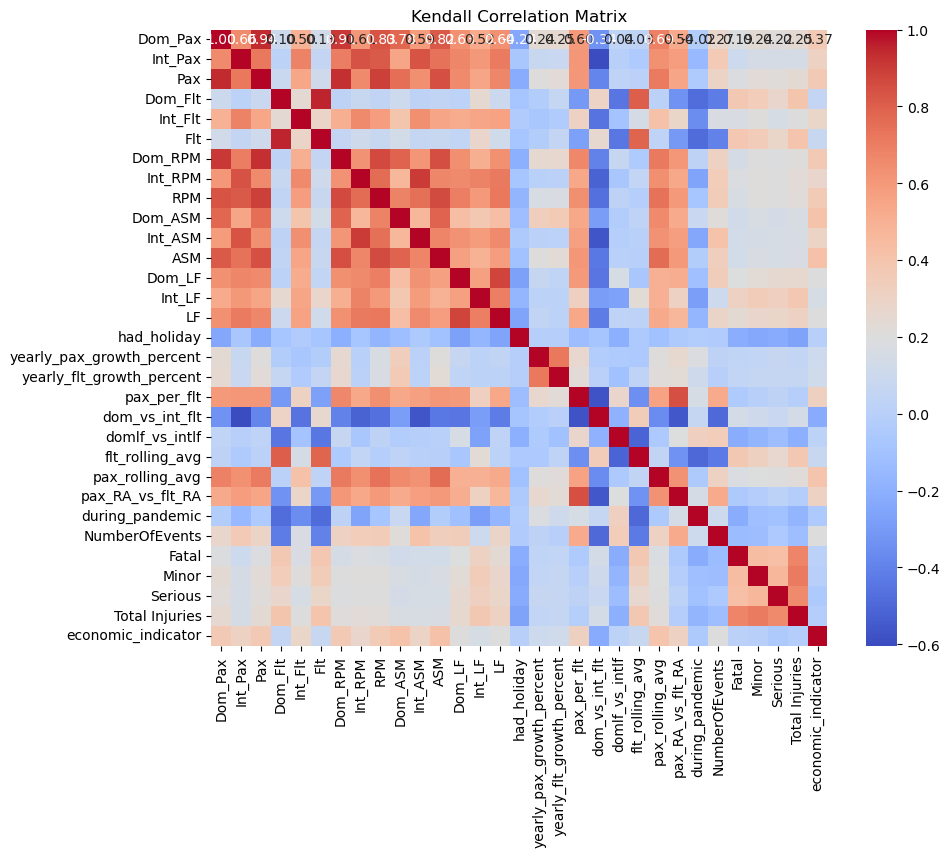

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(dfx_corr_kendall, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Kendall Correlation Matrix')
plt.show()

In [40]:
# Now Spearman

dfx_corr_spearman = dfx_numeric.corr('spearman', numeric_only=True)
dfx_corr_spearman

,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,...,flt_rolling_avg,pax_rolling_avg,pax_RA_vs_flt_RA,during_pandemic,NumberOfEvents,Fatal,Minor,Serious,Total Injuries,economic_indicator
Dom_Pax,1.000000,0.840245,0.993774,0.129621,0.653325,0.166972,0.987574,0.779784,0.960101,0.918131,...,0.032266,0.859458,0.719608,-0.026780,0.424247,0.273726,0.347070,0.319677,0.359716,0.543989
Int_Pax,0.840245,1.000000,0.890175,0.006407,0.850774,0.058888,0.864039,0.957995,0.949035,0.726329,...,-0.066150,0.818683,0.749898,-0.185936,0.548757,0.163179,0.226738,0.215400,0.227549,0.473045
Pax,0.993774,0.890175,1.000000,0.111932,0.704980,0.152957,0.987856,0.831222,0.982018,0.903258,...,0.015490,0.872044,0.738051,-0.055385,0.455762,0.262874,0.334796,0.308857,0.346355,0.542394
Dom_Flt,0.129621,0.006407,0.111932,1.000000,0.336777,0.996829,0.026354,0.087969,0.047383,0.095313,...,0.940804,0.011053,-0.458810,-0.588999,-0.623911,0.532068,0.494455,0.394968,0.555907,0.074306
Int_Flt,0.653325,0.850774,0.704980,0.336777,1.000000,0.394055,0.648430,0.823682,0.748361,0.538783,...,0.218354,0.562725,0.385304,-0.437603,0.270591,0.247376,0.314747,0.232268,0.305790,0.415967
Flt,0.166972,0.058888,0.152957,0.996829,0.394055,1.000000,0.065914,0.134106,0.091560,0.130709,...,0.929207,0.041693,-0.430388,-0.593716,-0.592633,0.533218,0.505624,0.400106,0.562132,0.104662
Dom_RPM,0.987574,0.864039,0.987856,0.026354,0.648430,0.065914,1.000000,0.786342,0.968140,0.927907,...,-0.066995,0.873201,0.793417,0.030279,0.493140,0.217164,0.292989,0.276891,0.299204,0.541080
Int_RPM,0.779784,0.957995,0.831222,0.087969,0.823682,0.134106,0.786342,1.000000,0.907619,0.628406,...,0.058901,0.816311,0.678320,-0.309639,0.517282,0.264801,0.309155,0.297462,0.334390,0.413415
RPM,0.960101,0.949035,0.982018,0.047383,0.748361,0.091560,0.968140,0.907619,1.000000,0.855761,...,-0.028226,0.896243,0.784858,-0.094946,0.529845,0.243419,0.307432,0.294335,0.321637,0.521995
Dom_ASM,0.918131,0.726329,0.903258,0.095313,0.538783,0.130709,0.927907,0.628406,0.855761,1.000000,...,0.012849,0.833919,0.706973,0.099663,0.383321,0.180709,0.239039,0.205100,0.236327,0.602535


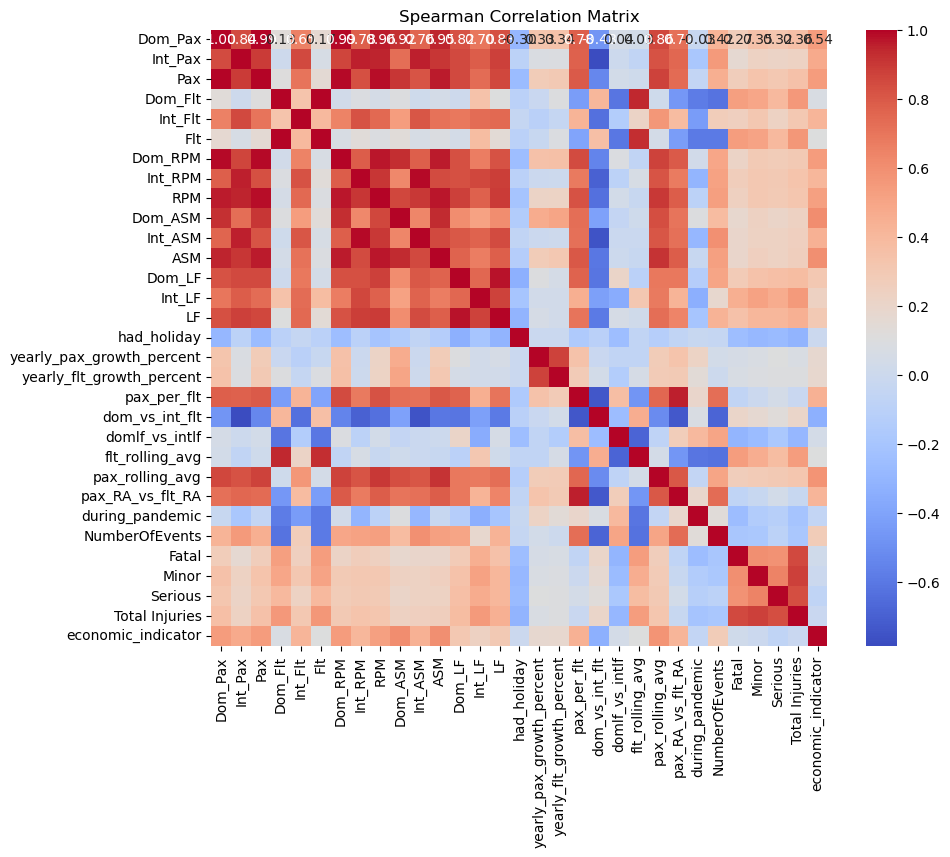

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(dfx_corr_spearman, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Spearman Correlation Matrix')
plt.show()

In [42]:
# Kendall corr seemed to be the best fit for this data. The following code lists every combination that has a
# positive corr score higher than 0.8, a negative score lower than -0.5, and isn't self-referential

corr_pairs = dfx_corr_kendall.unstack().reset_index()
corr_pairs.columns = ['Variable1', 'Variable2', 'Correlation']

corr_pairs = corr_pairs[corr_pairs['Variable1'] != corr_pairs['Variable2']]

positive_pairs = corr_pairs[corr_pairs['Correlation'] > 0.8]
negative_pairs = corr_pairs[corr_pairs['Correlation'] < -0.5]

combined_pairs = pd.concat([positive_pairs, negative_pairs], ignore_index=True)

combined_pairs['Ordered_Pair'] = combined_pairs.apply(lambda x: tuple(sorted([x['Variable1'], x['Variable2']])), axis=1)
combined_pairs = combined_pairs.drop_duplicates(subset='Ordered_Pair')

combined_pairs = combined_pairs.drop(columns=['Ordered_Pair'])
combined_pairs

,Variable1,Variable2,Correlation
0,Dom_Pax,Pax,0.939824
1,Dom_Pax,Dom_RPM,0.911776
2,Dom_Pax,RPM,0.832491
3,Dom_Pax,ASM,0.815974
4,Int_Pax,Int_RPM,0.838904
5,Int_Pax,RPM,0.815520
6,Int_Pax,Int_ASM,0.834694
8,Pax,Dom_RPM,0.928553
9,Pax,RPM,0.888781
10,Pax,ASM,0.849074


# Feature Selection
Is it possible to predict certain factors given others? If so, which model provides the most accurate results?
To answer those questions, I'll now perform the following on my dfx DataFrame to discover the best features for prediction.

I think my best bet is to try and predict passenger numbers.

In [43]:
# Using Random Forrest Regression to determine which features are the best predictors of Pax

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

dfx_for_rf = dfx.select_dtypes(include=[np.number])

correlation_with_pax = dfx_for_rf.corr()['Pax'].sort_values(ascending=False)

X = dfx_for_rf.drop(columns=['Pax'])
y = dfx_for_rf['Pax']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

feature_importances = pd.DataFrame(rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

print("Correlation with 'Pax':")
print(correlation_with_pax)
print("\nFeature Importances:")
print(feature_importances)

Correlation with 'Pax':
Pax                          1.000000
Dom_Pax                      0.997455
Dom_RPM                      0.989246
RPM                          0.988162
ASM                          0.970572
Dom_ASM                      0.931496
Int_Pax                      0.929643
pax_rolling_avg              0.914700
LF                           0.901488
Int_ASM                      0.891378
Dom_LF                       0.887840
Int_RPM                      0.886118
Int_LF                       0.837113
Int_Flt                      0.835727
pax_per_flt                  0.786149
pax_RA_vs_flt_RA             0.723993
Flt                          0.569839
Dom_Flt                      0.521094
economic_indicator           0.505482
flt_rolling_avg              0.470667
yearly_flt_growth_percent    0.356983
Total Injuries               0.326399
Serious                      0.288963
NumberOfEvents               0.286364
Minor                        0.281204
Fatal                     

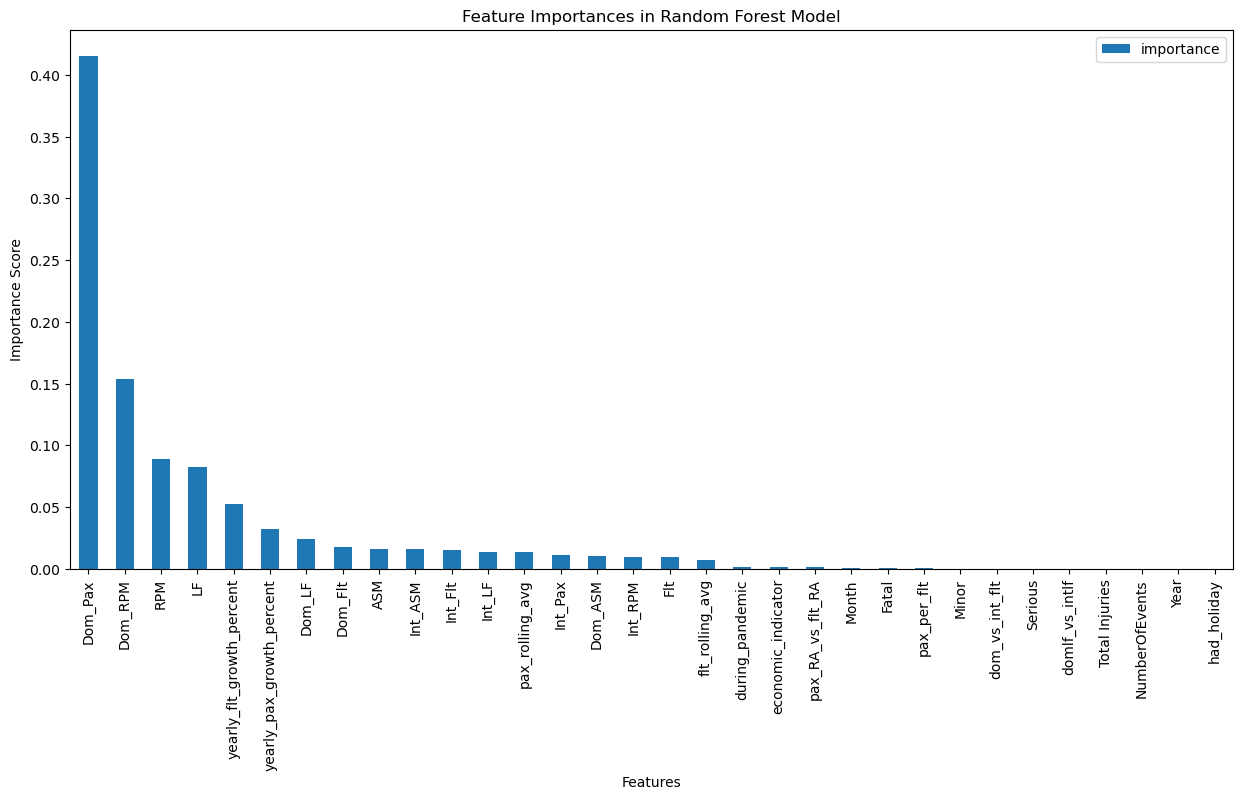

In [44]:
feature_importances.plot(kind='bar', figsize=(15, 7))
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

In [45]:
# Realistically, if I didn't know Pax, I likely wouldn't know Dom_Pax so I'm going to test a simple linear
# regression model that predicts Pax based on yearly_flt_growth_percentage; a fairly attainable number
# which isn't dependant upon already knowing Pax values.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

X = dfx[['yearly_flt_growth_percent']]
y = dfx['Pax']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

cv_scores = cross_val_score(model, X, y, cv=5)
print("CV Scores:", cv_scores)


# Okay, not so good of a fit. Maybe I'll try a polynomial regression instead and use some more factors
# that aren't dependant on already knowing Pax.

Mean Squared Error: 113711150604549.44
R-squared: -0.035233240142930056
CV Scores: [-1.20726018  0.0469557  -0.00704988 -2.88263038 -0.22774171]


In [46]:
# Using Polynomial Regression because I'll bet some relationships aren't linear and I can spare the CPU power.
# I'll also drop the columns that already assume I know Pax.

from sklearn.preprocessing import PolynomialFeatures

X = dfx.drop(columns=['Pax', 'Date', 'Dom_Pax', 'Int_Pax', 'yearly_pax_growth_percent', 'pax_per_flt',
                     'pax_rolling_avg', 'pax_RA_vs_flt_RA', 'Int_RPM', 'RPM', 'Dom_ASM'])
y = dfx['Pax']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
cv_scores = cross_val_score(model, X, y, cv=5)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print("CV Scores:", cv_scores)

Mean Squared Error: 452492274571.61
R-squared: 1.00
CV Scores: [0.98929316 0.99629518 0.99556848 0.99468066 0.96721309]


In [47]:
# Really good r2 score, but there's too many independant variables.
# Running recursive feature elimination to reduce X to the minimum.

from sklearn.feature_selection import RFE

model = LinearRegression()

rfe = RFE(model, n_features_to_select=1)

rfe.fit(X, y)

feature_ranking = rfe.ranking_
feature_ranking

array([ 9, 17,  3,  1,  2, 20, 21, 23, 11, 13, 12,  8, 18, 14, 10, 19, 15,
       22,  6,  5,  7,  4, 16])

In [48]:
# Getting only the top five predictive features

top_indices = feature_ranking[:5] # Change number of top features here
selected_columns = X.columns[top_indices]

X_top = X[selected_columns]

for column in X_top.columns:
    print(column)

Int_LF
NumberOfEvents
Int_Flt
Month
Dom_Flt


In [49]:
# Running the Polynomial Regression again. Same degree, only top features.

X = X_top
y = dfx['Pax']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
cv_scores = cross_val_score(model, X, y, cv=5)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print("CV Scores:", cv_scores)

Mean Squared Error: 23288307747977.16
R-squared: 0.79
CV Scores: [ 0.83241679  0.44597674 -0.8331624   0.56630284  0.48873578]


# Model Evaluation Findings
Based on the above tests, the model I eventually went with was a Polynomial Regression model. Running it initially on all columns that weren't determinant on already knowing Pax, I came up with an r2 score of 0.97 which seems likey to be a factor of overfitting.

I then ran recursive feature elimination to minimize the number of independant variables needed for a prediction.

What I found was that I could achive an r2 score of 0.77 by using only 'Int_RPM' with a degree of 1. Adding the next 4 highest features (all injury related) had no effect on r2 score.

This in and of itself is interesting, but I decided to try again to see if eliminating this feature would make said r2 score impossible.

Strangely, eliminating 'Int_RPM' improved the overall scores. Now using the top 5 of RPM, flt_rolling_avg, Serious, NumberOfEvents, and Minor, I can get a r2 of 0.99 with a degree of 2.

Using only the top 3 columns yields and r2 of 0.98 so I'm starting to suspect that RPM has a similar overfitting effect since it is the measure of paying passengers being carried a mile. I'll try eliminating it.

If RPM is absent, the top 5 predictive features are Dom_ASM, during_pandemic, Total Injuries, Fatal, and Serious which yield and r2 of 0.89, but CV scores of 0.13654407 0.7873219  0.40076702 0.93019752 0.85059246 which is a pretty wide spread. Reducing the degree from 2 to 1 improved the scores to:

Mean Squared Error: 8401131496419.39
R-squared: 0.92
CV Scores: [0.13654407 0.7873219  0.40076702 0.93019752 0.85059246]

If I reduce that to the top 3 features of Dom_ASM, during_pandemic, and Total Injuries, the scores only don't meaningfully change and are now: 

Mean Squared Error: 8462548582684.90
R-squared: 0.92
CV Scores: [0.15864568 0.77822757 0.39640414 0.92945577 0.86030124]

Upon further consideration, ASM would also contain elements that could be used to deduce Pax numbers so I'll eliminate that as well and try again.



And this is where I think I'll stop.

### Therefore, given the Polynomial Regression model's scores of Mean Squared Error: 8462548582684.90, R-squared: 0.92, and CV Scores: [0.15864568, 0.77822757, 0.39640414, 0.92945577, 0.86030124], and given the input features Dom_ASM, during_pandemic, and Total Injuries, I could predict the number of Passengers with approximately 92% accuracy.

### However, if Dom_ASM were unavailable, using Int_LF, NumberOfEvents, Int_Flt, Month, Dom_Flt would yield a less-impressive but statistically significant r2 score of 0.79 with a MSE of 23288307747977.16 and cross variation scores of [ 0.83241679  0.44597674 -0.8331624   0.56630284  0.48873578].